In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('train.csv/train.csv')

In [3]:
dataframe.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
dataframe.shape

(404290, 6)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
dataframe['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

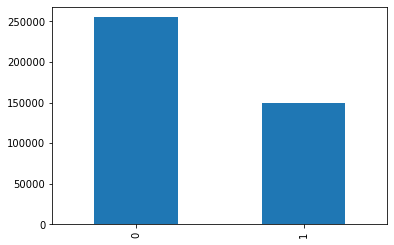

In [7]:
dataframe['is_duplicate'].value_counts().plot(kind = 'bar')


In [8]:
qid1_list = dataframe['qid1'].tolist()
qid2_list = dataframe['qid2'].tolist()

In [9]:
questions = pd.Series(qid1_list + qid2_list)

In [10]:
unique_questions = len(np.unique(questions))

In [11]:
print("Number of unique questions:",unique_questions)

Number of unique questions: 537933


In [12]:
qs_morethan_onetime = np.sum(questions.value_counts() > 1)

In [13]:
print("Number of questions that appear more than one time:",qs_morethan_onetime)

Number of questions that appear more than one time: 111780


In [14]:
max(questions.value_counts())

157

In [15]:
df = dataframe[['qid1','qid2','is_duplicate']]

In [16]:
df.head()

,qid1,qid2,is_duplicate
0,1,2,0
1,3,4,0
2,5,6,0
3,7,8,0
4,9,10,0


In [17]:
df1=df.groupby(['qid1','qid2'])

In [18]:
x = df1.count().reset_index()

In [19]:
x

,qid1,qid2,is_duplicate
0,1,2,1
1,3,4,1
2,3,282170,1
3,3,380197,1
4,3,488853,1
5,4,32881,1
6,5,6,1
7,7,8,1
8,9,10,1
9,9,109465,1


In [20]:
x.shape

(404290, 3)

In [21]:
dataframe.shape

(404290, 6)

In [22]:
print("Number of duplicate question pairs:",x.shape[0]-dataframe.shape[0])

Number of duplicate question pairs: 0


Text(0, 0.5, 'Number of questions')

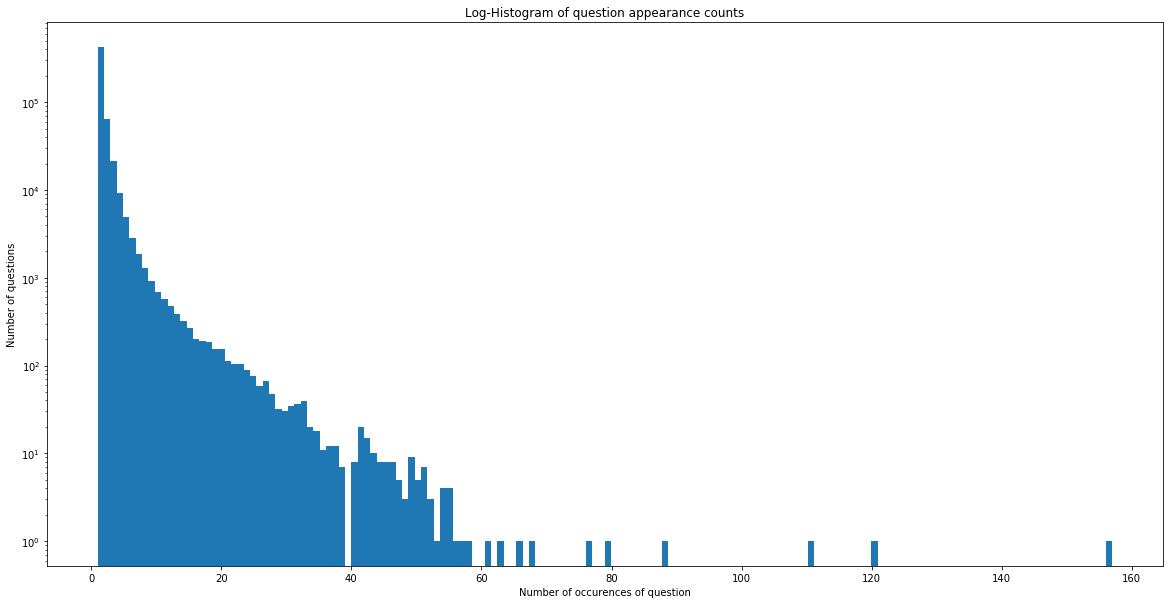

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.hist(questions.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

In [24]:
dataframe.dropna()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0
